In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from termcolor import colored

In [3]:
Feature_Selection =['p1_d', 'p2_d', 'min_d', '#sp', '#dp', 'first_sp', 'first_dp', 'second_sp', 'second_dp','Type']

# Data Load

In [2]:
data_A = pd.read_csv('data_identificada.csv')
data_B = pd.read_csv('data_no_identificada.csv')

### Estructuración del conjunto de datos con las mejores caracteristicas

In [6]:
data_A = data_A[Feature_Selection]
data_B = data_B[Feature_Selection]

# Data Inspection

### Inspección datos faltantes

In [56]:
avaliable_A = data_A.isnull().sum()
avaliable_A

p1_d          0
p2_d          0
min_d         0
#sp           0
#dp           0
first_sp      0
first_dp      0
second_sp    32
second_dp    32
Type          0
dtype: int64

In [48]:
avaliable_B = data_B.isnull().sum()
avaliable_B

p1_d            0
p2_d            0
min_d           0
#sp             0
#dp             0
first_sp        0
first_dp        0
second_sp    7498
second_dp    1708
Type            0
dtype: int64

In [54]:
porce_sec_sp = np.round(avaliable_A['second_sp'] / data_A.shape[0], 3) * 100
print(colored(f'El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de {porce_sec_sp}%.', attrs=['bold']))

El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de 0.7000000000000001%.


In [55]:
porce_sec_sp = np.round(avaliable_A['second_dp'] / data_A.shape[0], 3) * 100
print(colored(f'El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de {porce_sec_sp}%.', attrs=['bold']))

El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de 0.7000000000000001%.


In [52]:
porce_sec_sp = np.round(avaliable_B['second_sp'] / data_B.shape[0], 3) * 100
print(colored(f'El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de {porce_sec_sp}%.', attrs=['bold']))

El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de 19.0%.


In [53]:
porce_sec_sp = np.round(avaliable_B['second_dp'] / data_B.shape[0], 3) * 100
print(colored(f'El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de {porce_sec_sp}%.', attrs=['bold']))

El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de 4.3%.


### Variable Objetivo

Text(0.5, 0, '')

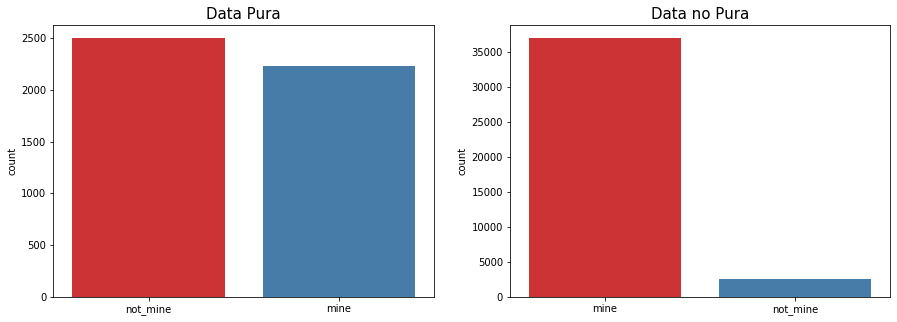

In [12]:
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize = (15,5))
ax = ax.flat
sns.countplot(x='Type', data=data_A, palette="Set1", ax = ax[0])
sns.countplot(x='Type', data=data_B, palette="Set1", ax = ax[1])
ax[0].set_title("Data Pura", size = 15)
ax[0].tick_params(labelsize = 10)
ax[0].set_xlabel("")
ax[1].set_title("Data no Pura", size = 15)
ax[1].tick_params(labelsize = 10)
ax[1].set_xlabel("")

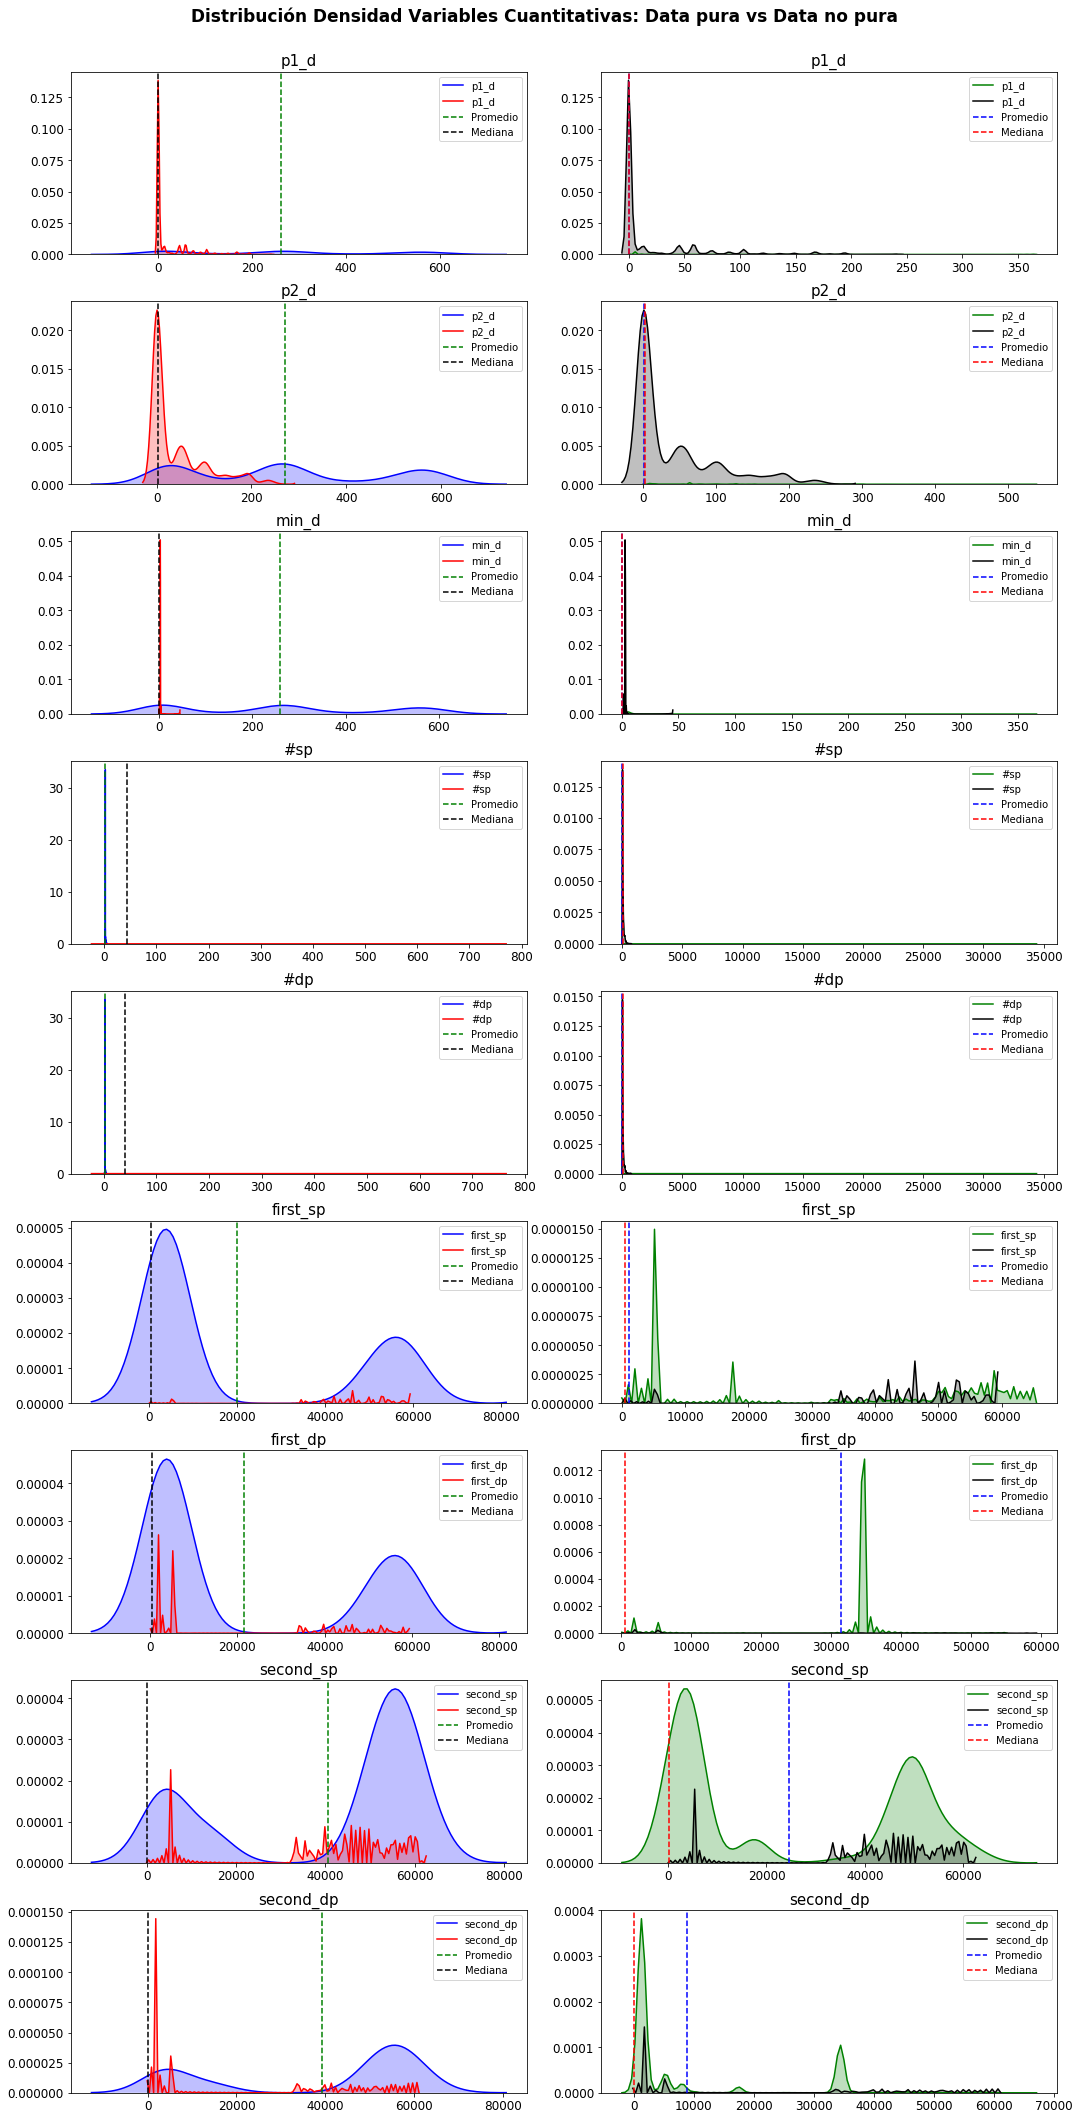

In [40]:
fig, ax = plt.subplots(nrows = 9, ncols = 2, figsize = (15,30))
ax = ax.flat
a = 0
b = 1
for i, col in enumerate(Feature_Selection[0:len(Feature_Selection)-1]):
    if i > 0: 
        a = a+1
        b = b+1
    sns.kdeplot(data_A[data_A['Type'] == 'mine'][col], color='blue', shade=True, ax = ax[i+a])
    sns.kdeplot(data_A[data_A['Type'] == 'not_mine'][col], color='red', shade=True, ax = ax[i+a])
    ax[i+a].axvline(data_A[data_A['Type'] == 'mine'][col].mean(), c='green', linestyle = '--', label = 'Promedio')
    ax[i+a].axvline(data_A[data_A['Type'] == 'not_mine'][col].median(), c='black', linestyle = '--', label = 'Mediana')
    
    ax[i+a].set_title(col, size = 15)
    ax[i+a].tick_params(labelsize = 12)
    ax[i+a].set_xlabel("", size=9)
    ax[i+a].legend()
    
    sns.kdeplot(data_B[data_B['Type'] == 'mine'][col], color='green', shade=True, ax = ax[i+b])
    sns.kdeplot(data_B[data_B['Type'] == 'not_mine'][col], color='black', shade=True, ax = ax[i+b])
    ax[i+b].axvline(data_B[data_B['Type'] == 'mine'][col].mean(), c='blue', linestyle = '--', label = 'Promedio')
    ax[i+b].axvline(data_B[data_B['Type'] == 'not_mine'][col].median(), c='red', linestyle = '--', label = 'Mediana')
    ax[i+b].set_title(col, size = 15)
    ax[i+b].tick_params(labelsize = 12)
    ax[i+b].set_xlabel("", size=9)
    ax[i+b].legend()
    

fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Distribución Densidad Variables Cuantitativas: Data pura vs Data no pura', fontsize = 17, fontweight = "bold");


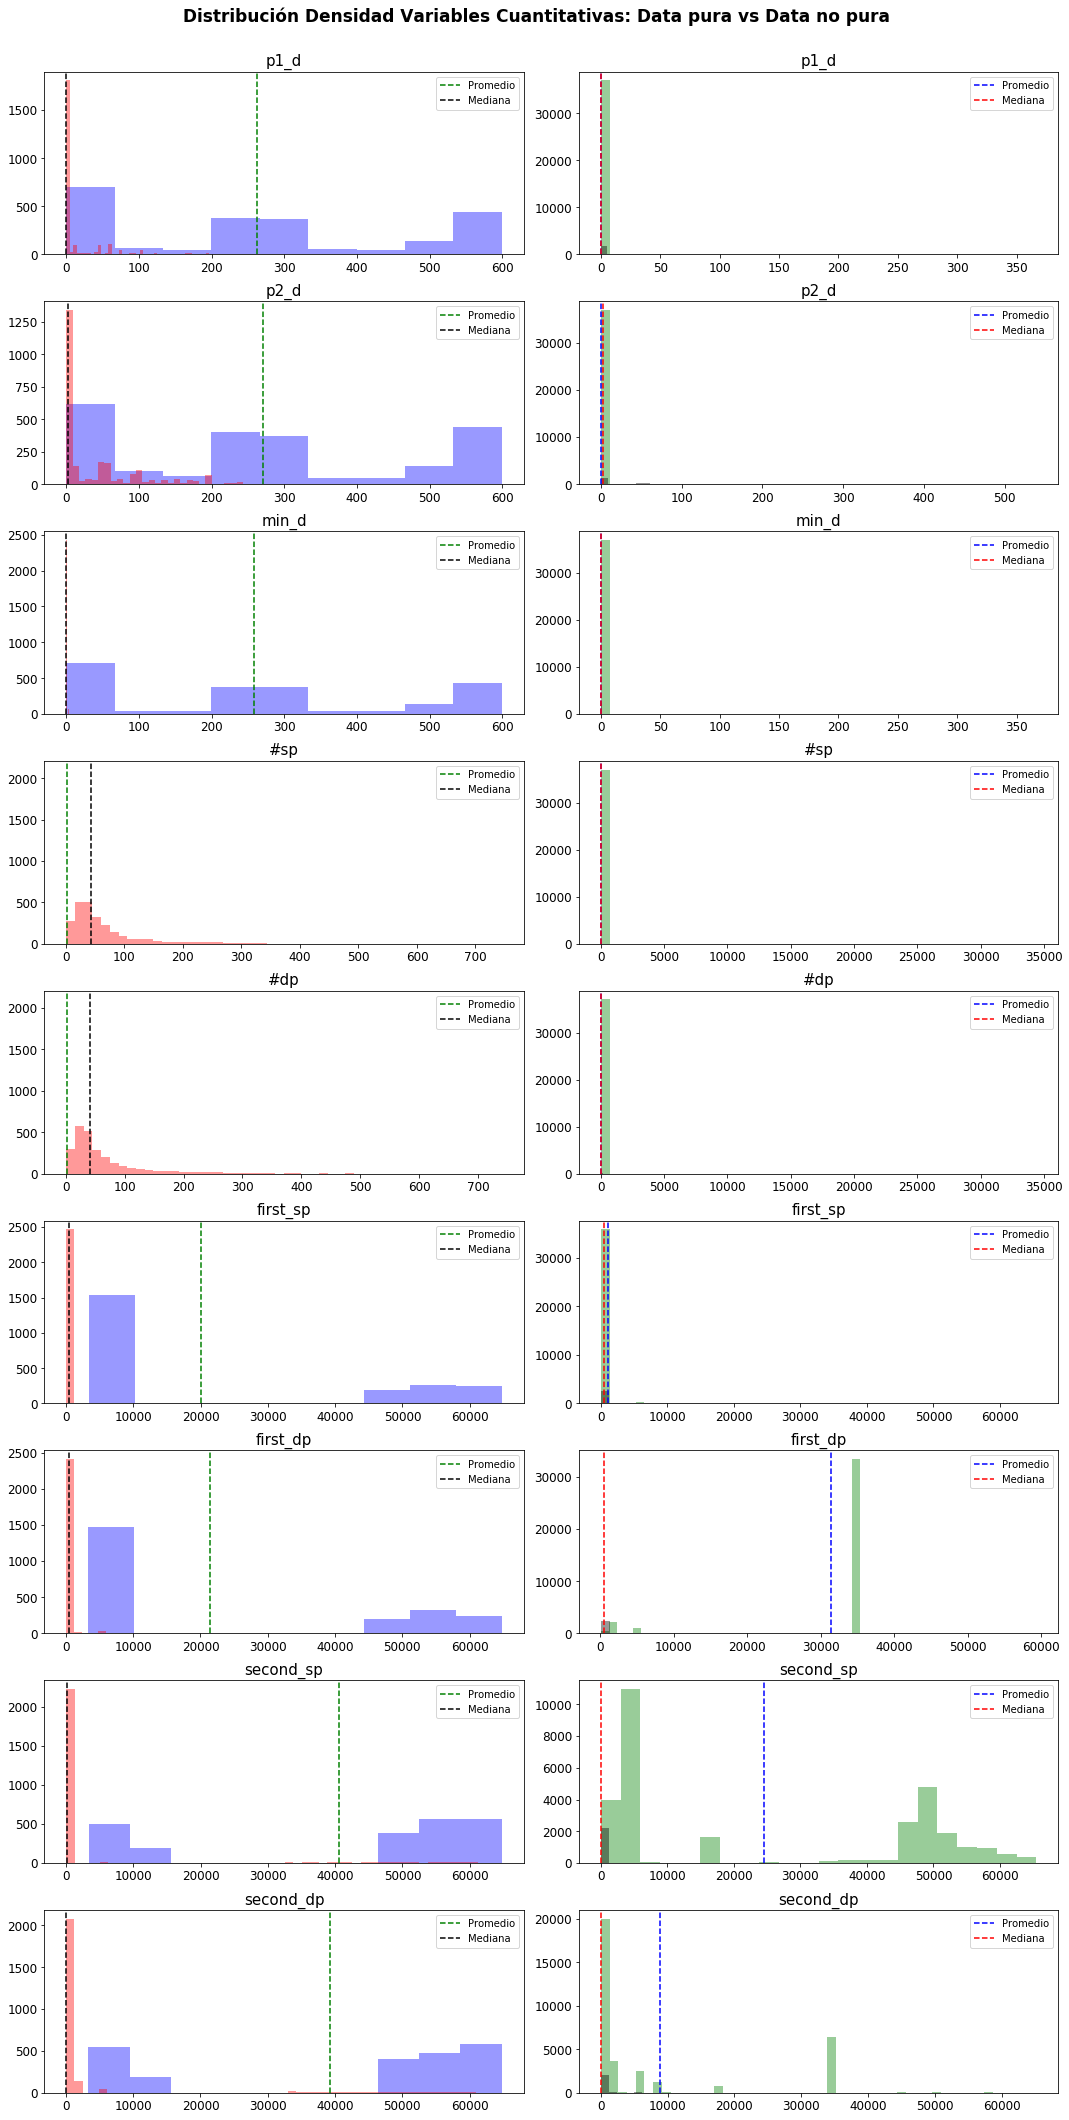

In [57]:
fig, ax = plt.subplots(nrows = 9, ncols = 2, figsize = (15,30))
ax = ax.flat
a = 0
b = 1
for i, col in enumerate(Feature_Selection[0:len(Feature_Selection)-1]):
    if i > 0: 
        a = a+1
        b = b+1
    sns.distplot(data_A[data_A['Type'] == 'mine'][col].dropna(), color='blue', kde=False, ax = ax[i+a])
    sns.distplot(data_A[data_A['Type'] == 'not_mine'][col].dropna(), color='red', kde=False,ax = ax[i+a])
    ax[i+a].axvline(data_A[data_A['Type'] == 'mine'][col].mean(), c='green', linestyle = '--', label = 'Promedio')
    ax[i+a].axvline(data_A[data_A['Type'] == 'not_mine'][col].median(), c='black', linestyle = '--', label = 'Mediana')
    
    ax[i+a].set_title(col, size = 15)
    ax[i+a].tick_params(labelsize = 12)
    ax[i+a].set_xlabel("", size=9)
    ax[i+a].legend()
    
    sns.distplot(data_B[data_B['Type'] == 'mine'][col].dropna(), color='green',kde=False, ax = ax[i+b])
    sns.distplot(data_B[data_B['Type'] == 'not_mine'][col].dropna(), color='black',kde=False, ax = ax[i+b])
    ax[i+b].axvline(data_B[data_B['Type'] == 'mine'][col].mean(), c='blue', linestyle = '--', label = 'Promedio')
    ax[i+b].axvline(data_B[data_B['Type'] == 'not_mine'][col].median(), c='red', linestyle = '--', label = 'Mediana')
    ax[i+b].set_title(col, size = 15)
    ax[i+b].tick_params(labelsize = 12)
    ax[i+b].set_xlabel("", size=9)
    ax[i+b].legend()
    

fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Histogramas Variables Cuantitativas: Data pura vs Data no pura', fontsize = 17, fontweight = "bold");


In [63]:
sns.scatterplot(x="first_sp", y=data_A, data=data_A)

ValueError: could not broadcast input array from shape (4733) into shape (10)